# Retificador de meia onda (Carga R/L)

<center>
<img width="300" height="500" src="Figuras/02_meia_onda_rl.png">
</center>

In [47]:
from funcoes import *
%run funcoes.py
%matplotlib inline

Ângulo beta =  4.959444972303682 rads ou 284.15526564037646 graus
# - Tensão na carga - # 
Vpk:	 70.71067811865476 
Vm: 	 8.501794949497082 
Vrms: 	 45.471414116030125
# - Corrente na carga - # 
Ipk: 	 0.48888830868072297 
Im: 	 0.21254487381763862 
Irms: 	 0.2815655707865584
# - Potências - # 
Ppk:	 24.990773521790754 
P: 	 3.171166825884667 
S: 	 14.07827853932792
# - Fatores - # 
FP:	 0.22525245661434784 
THD V:	 0.4145136660167334 
THD I:	 1.1687573678047987


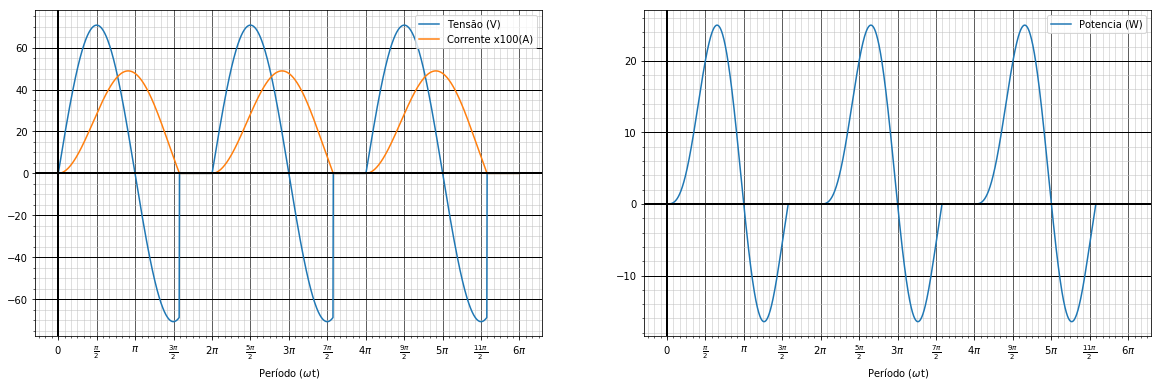

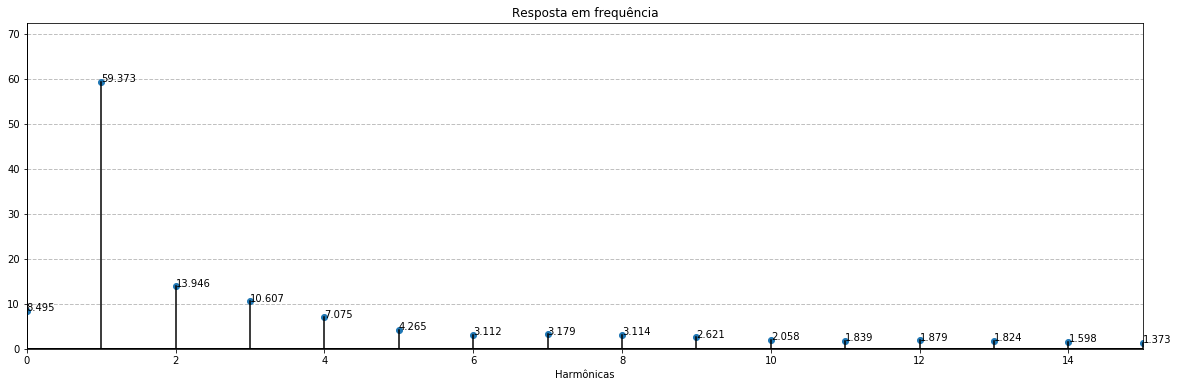

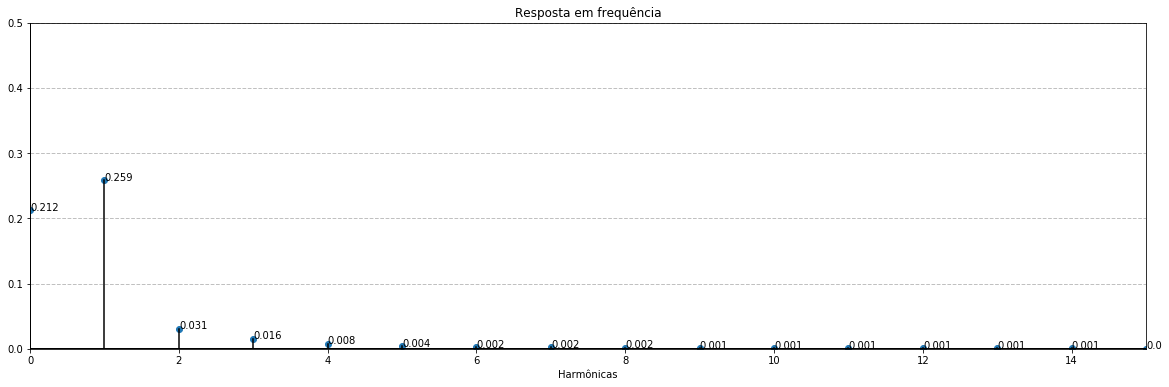

In [70]:
############# RETIFICADOR MEIA ONDA #############
################### CARGA R/L ###################

V_pk = 50*sqrt(2)
Freq = 60
R = 40
L = 0.6

T = 2*pi
w = 2*pi*Freq

XL = w * L
XRL = complex(R,XL)

Z = abs(XRL)
teta = cm.phase(XRL)
tal = L/R

a = 0

ab = calculo_ab(f'(sin(x - {teta}) + sin({teta})*exp(-x/({w}*{tal})))', (110/100)*pi, 'scipy')
b = ab[0]

func_v = f'{V_pk}*sin(x)*{degrau(a,b)}'
V_media = calculo_medio(func_v)
V_rms = calculo_rms(func_v)

func_i = f'({V_pk}/{Z})*(sin(x - {teta}) + sin({teta})*exp(-x/({w}*{tal})))*{degrau(a,b)}'
I_media = calculo_medio(func_i)
I_rms = calculo_rms(func_i)
I_pk = calculo_pk(func_i)

#func_p = '(' + func_v + ')*(' + func_i + ')'
func_p = f'({func_v}) * ({func_i})'
P = calculo_medio(func_p)
S = I_rms*(V_pk/sqrt(2))
Q = sqrt(S**2 - P**2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_v, T)
thdI = calculo_thd(func_i, T)

print("Ângulo beta = ", b, "rads ou", (b*180/pi), "graus")
print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk, "\nVm: \t"  , V_media, "\nVrms: \t", V_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk, "\nIm: \t"  , I_media, "\nIrms: \t", I_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P      , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV   , "\nTHD I:\t", thdI)

plot_info(func_v, func_i, xlim=(0, T))
fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=False, sharex=True)
plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)
fig, (ax3) = plt.subplots(1, 1, figsize=(20, 6), sharey=False, sharex=True)
plot_fft(func_i, ax3, T=2*np.pi, n_harmonicas = 15)